In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.decomposition import PCA
from keras.datasets import mnist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import NMF
import pandas as pd
import seaborn as sns

Lets plot the original dataset, by keeping only three out of four dimensions, so we can see the spread of the data points and which attribute contributes the most to the variance.

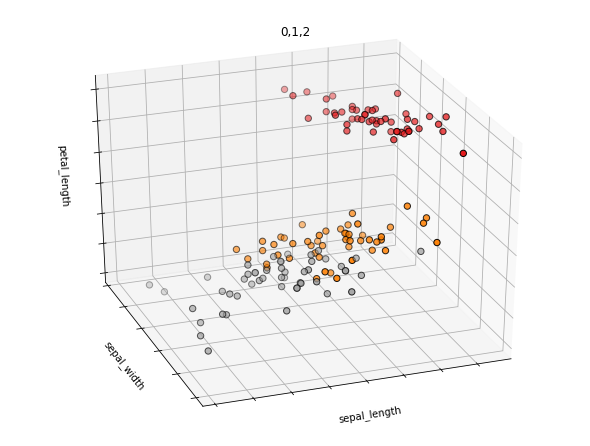

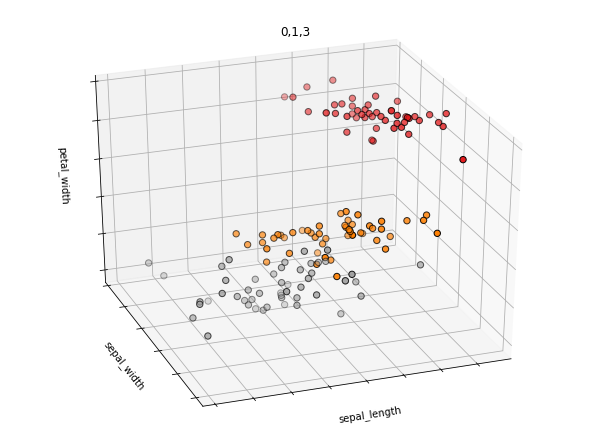

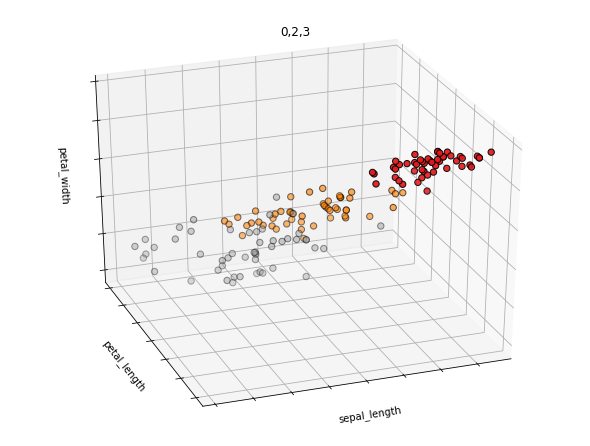

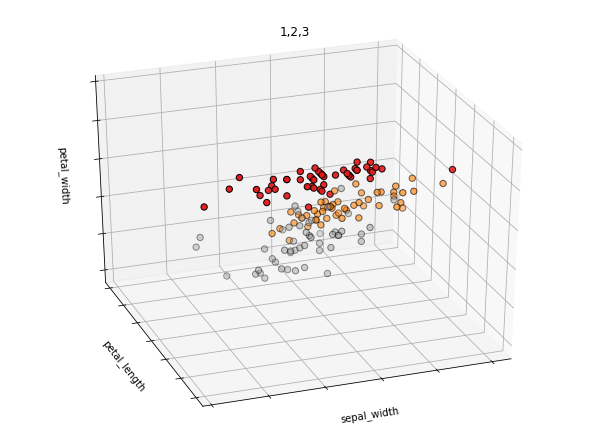

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target


# To getter a better understanding of interaction of the dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = X 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("0,1,2")
ax.set_xlabel("sepal_length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal_width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal_length")
ax.w_zaxis.set_ticklabels([])

fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = X 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 3], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("0,1,3")
ax.set_xlabel("sepal_length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal_width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal_width")
ax.w_zaxis.set_ticklabels([])

fig = plt.figure(3, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = X 
ax.scatter(X_reduced[:, 0], X_reduced[:, 2], X_reduced[:, 3], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("0,2,3")
ax.set_xlabel("sepal_length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("petal_length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal_width")
ax.w_zaxis.set_ticklabels([])

fig = plt.figure(4, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = X 
ax.scatter(X_reduced[:, 1], X_reduced[:, 2], X_reduced[:, 3], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("1,2,3")
ax.set_xlabel("sepal_width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("petal_length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal_width")
ax.w_zaxis.set_ticklabels([])

plt.show()

Now, lets see how the data will be after performing PCA and plotting the first three Principal Components

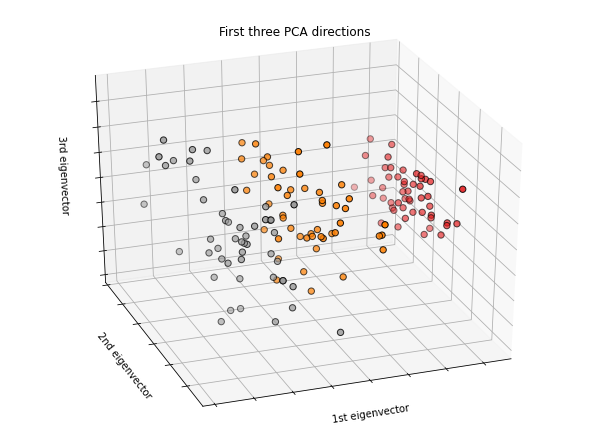

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

We can see that data points are more evenly spread after performing PCA, and each cluster of data can be dishtinguished easier than just keeping any random three attributes from the original dataset.

Below we can see the variance expained by each of the four attributes of our dataset.

In [ ]:
X = iris.data
y = iris.target
pca = PCA(n_components=4)
X_reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


We can see that most of the variance can be explained by the first component, so if we end up not using it, we will loose a lot of information, resulting into a dataset that looks like blendered points, points that dont seem like thay have any relation among them, or else, clusters that represent the result we want will be harder to form.

This can be seen below, were we use all the other components but the first one.

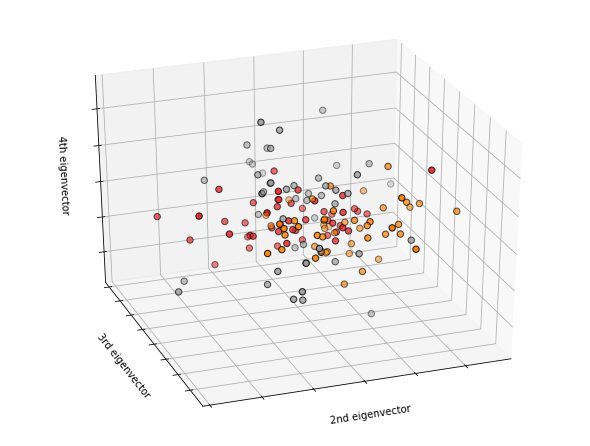

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=4).fit_transform(iris.data)
ax.scatter(X_reduced[:, 1], X_reduced[:, 2], X_reduced[:, 3], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("")
ax.set_xlabel("2nd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("3rd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("4th eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

After performing PCA, we end up with an array with similar dimensions as our original data, but this time it contains weights.

We can see below the first instance of the X_reduced array, which we created on the above cell via PCA

In [ ]:
X_reduced[1]

array([-2.71414169, -0.17700123, -0.21046427, -0.09902655])

Lets have a look on how these weights were created.

We will create a new array (X_new) with our data, by subtracting the mean values from our original dataset.

If we multiply X_new with any of the Components, and sum the results, we will get the corresponding value on the X_reduced array above.

An example is given on the next cell.

In [ ]:
#subtract mean values from the original dataset
X_new = X - X.mean(axis=0)

#multiply the values of a particular row, with any of the components we want
first_value = X_new[1]  * pca.components_.T[:,0]


#print all the values and their sum
print(first_value)
print("sum =", sum(first_value))

[-0.34090802  0.00484596 -2.02002929 -0.35805034]
sum = -2.714141687294326


We can see that the absolute **sum** is the exact same number as the fisrt value on the **X_reduced[1]** array above.

If we wanted the second value, we would have done the exact same process, but this time instead of multiplying with **pca.components_.T[:,0]**, we would multiply with **pca.components_.T[:,1]** etc.

The contribution of each feature on the particular example above, can be seen easier on the next cell

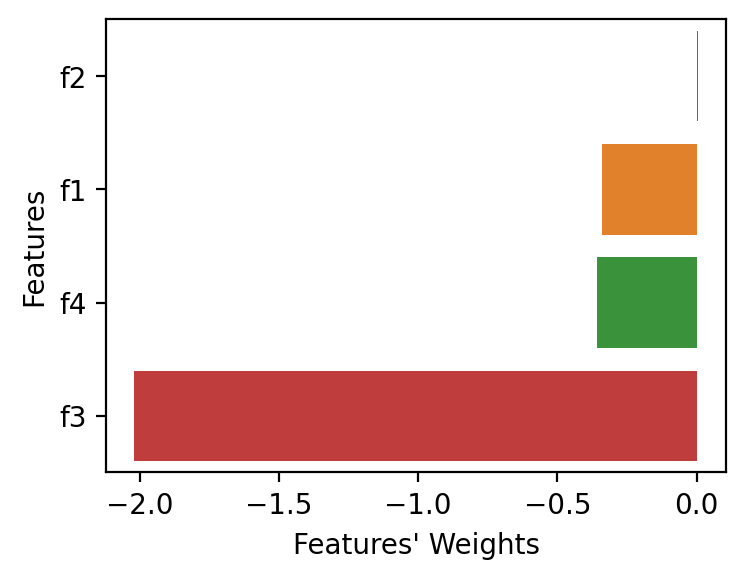

In [ ]:
model_weights = pd.DataFrame({"Features": ["f1","f2","f3","f4"], "Features' Weights": list(X_new[1]* pca.components_.T[:,0])})
model_weights = model_weights.sort_values(by="Features' Weights", ascending=False)
model_weights = model_weights[(model_weights["Features' Weights"] != 0)]
plt.figure(num=None, figsize=(4, 3), dpi=200, facecolor='w', edgecolor='k')
sns.barplot(x="Features' Weights", y="Features", data=model_weights)
plt.show()

We can see that the third feature contributes the most in this case.

Lets now see which feature contributes the most among all of our dataset.

More specifically, for each instance of our dataset, we keep track of the features that contributed the most. For example, on the cell above, we have the instance on the position 1, and we multiply it with the first component, with a result that the third (f3) feture contributed the most. We do the same for the rest three components and we end up with four fetures, one for each component. Finaly we keep the one out of these four fetures that appears the most times.

We do the same process for the rest instanses of our dataset.

In [ ]:
all_counter = np.zeros(4)
for i in range(len(X_new)):
  counter = np.zeros(4)
  for j in range(4):
    arr = X_new[i]* pca.components_.T[:,j] 
    arr = abs(arr)
    counter[np.argmax(arr)] += 1
  all_counter[np.argmax(counter)] += 1
print(all_counter)

[65. 30. 50.  5.]


We notice that out of the 150 data instances, on 65 of those the first feature contributed the most, the second feature contributed the most on 30 instances, the third on 50, and the fourth on 5.

Below we can see the plot using only the fisrt and third feature.

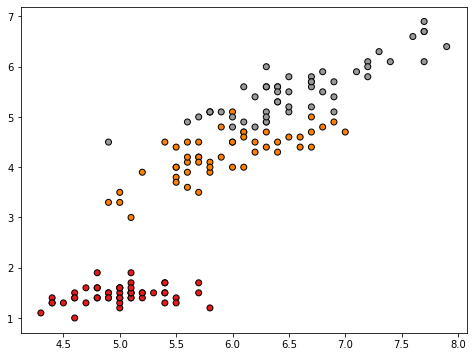

In [ ]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the points
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
